In [1]:
import sys

sys.path.append("..")
from model.segmentation_model import SegmentationModel
import torch
import numpy as np

import matplotlib.pyplot as plt


<ipython-input-54-bbce586e0dcb>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(3,1, figsize=(3,3*3))


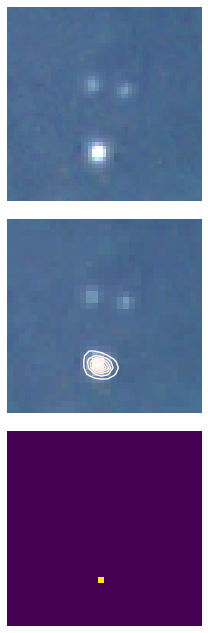

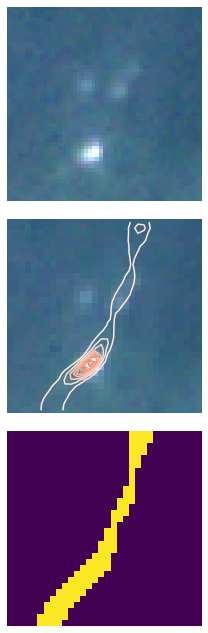

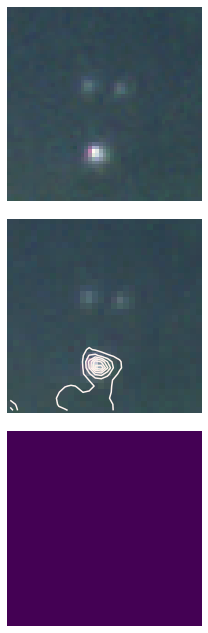

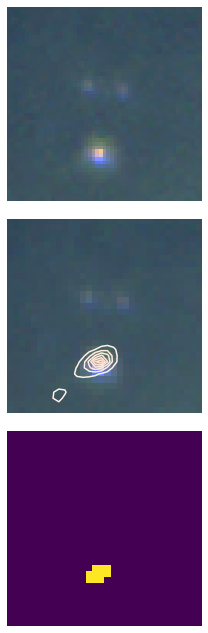

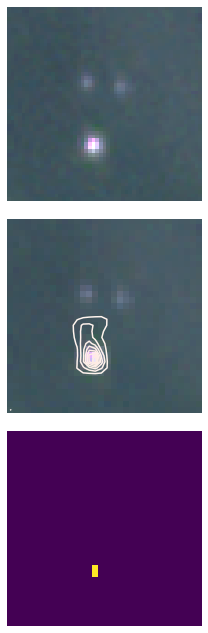

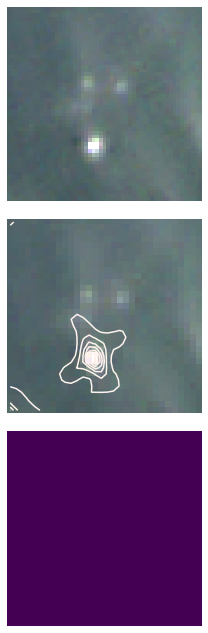

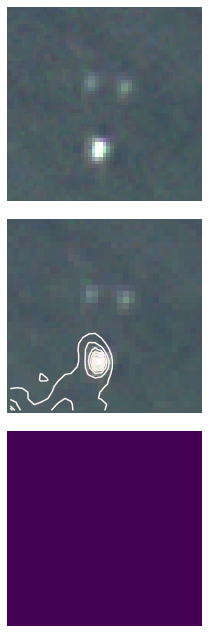

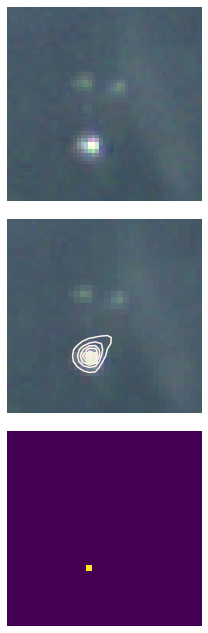

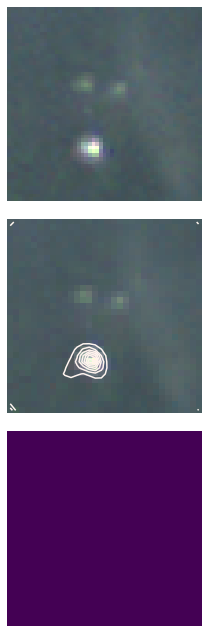

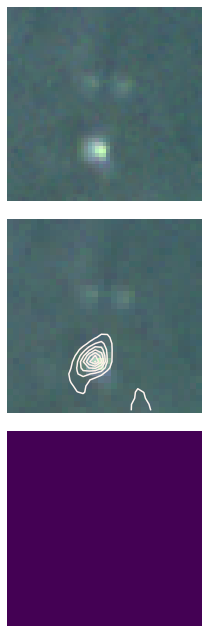

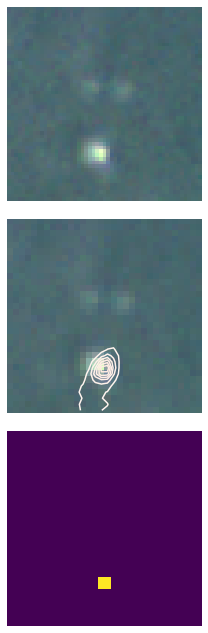

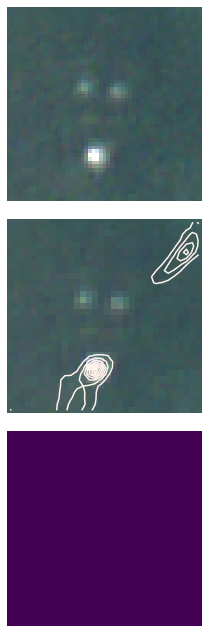

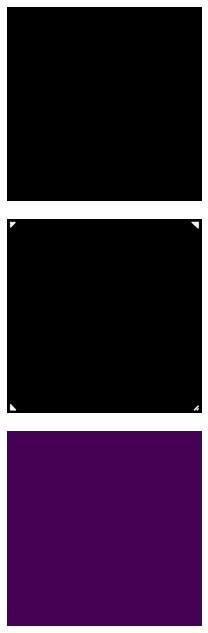

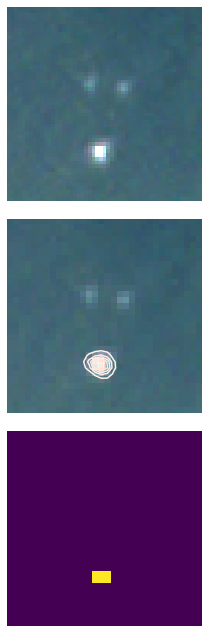

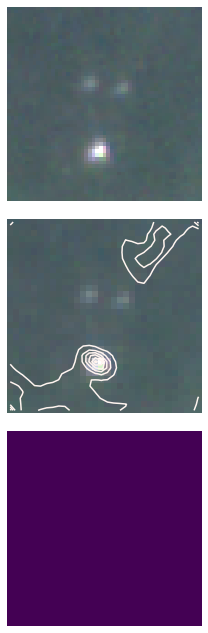

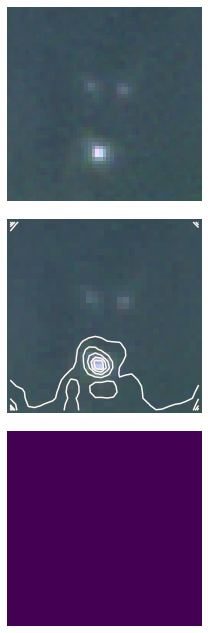

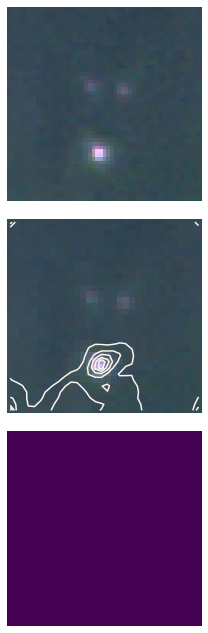

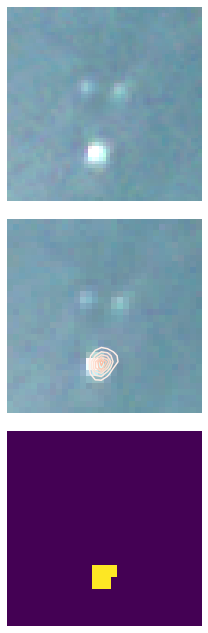

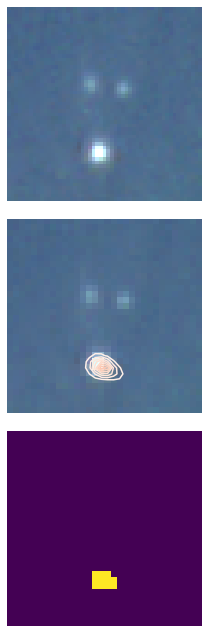

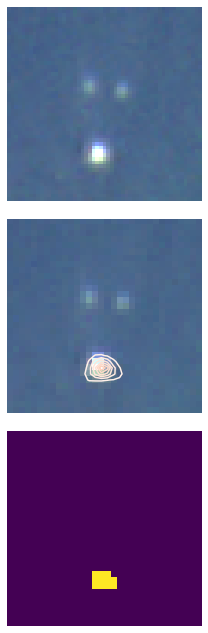

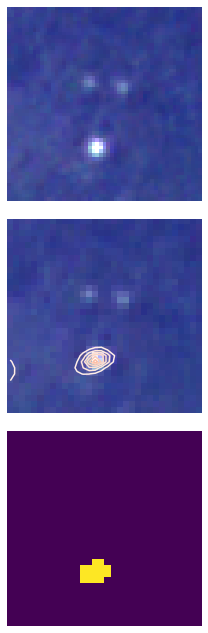

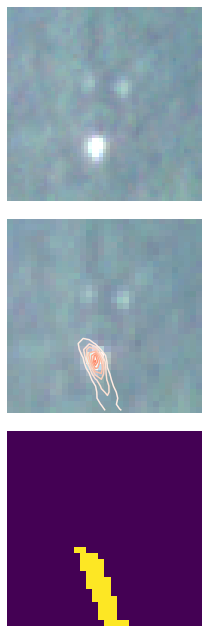

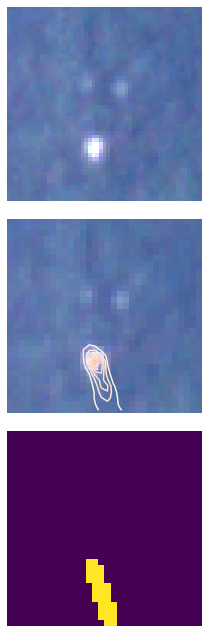

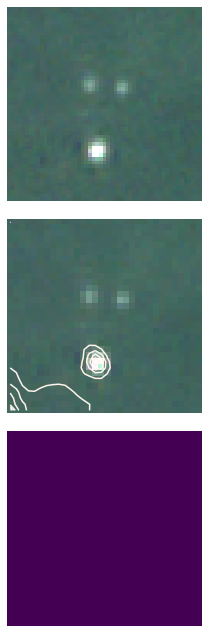

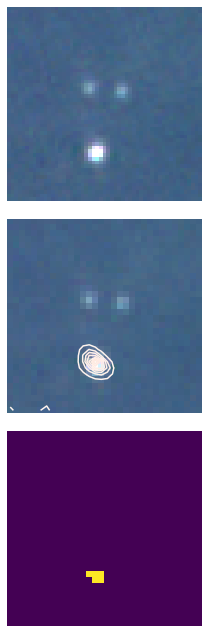

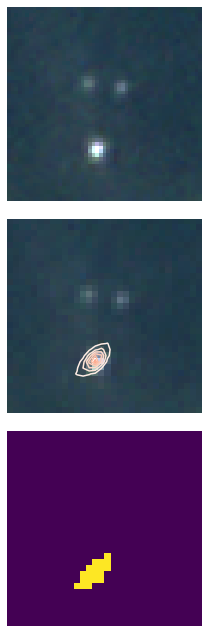

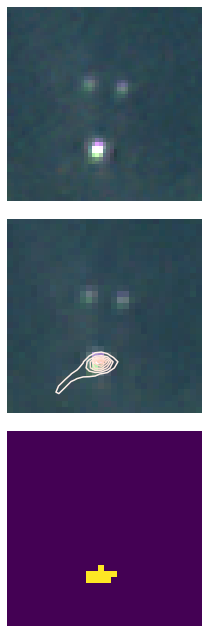

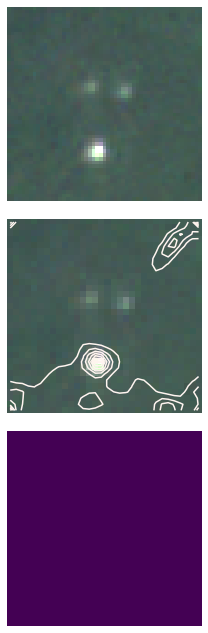

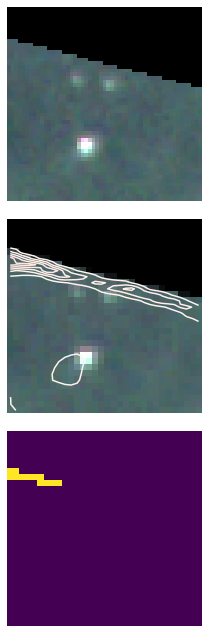

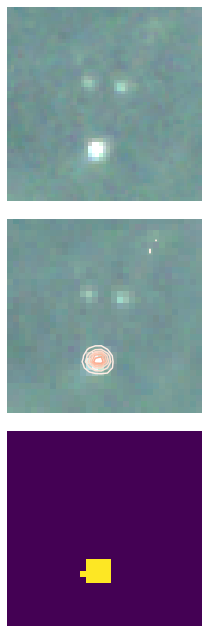

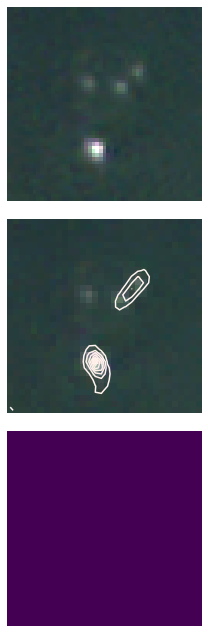

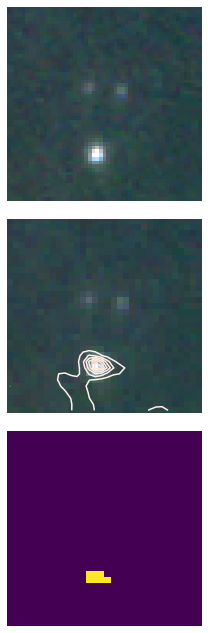

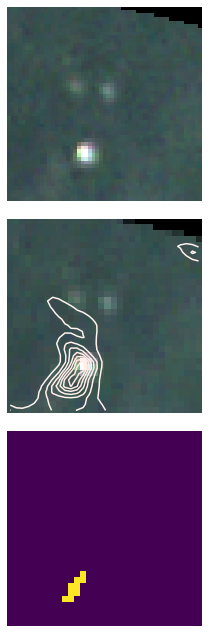

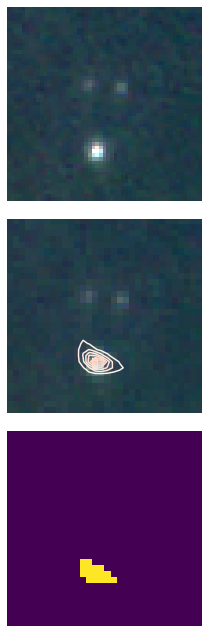

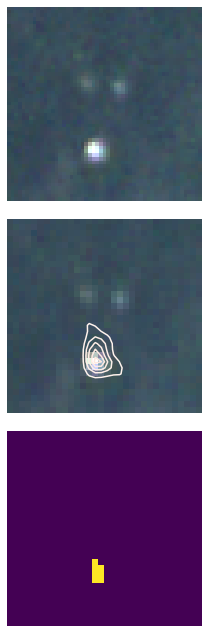

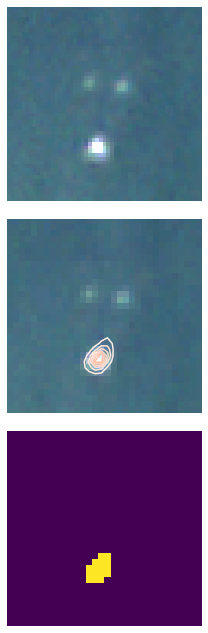

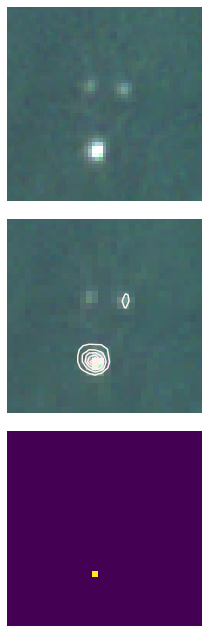

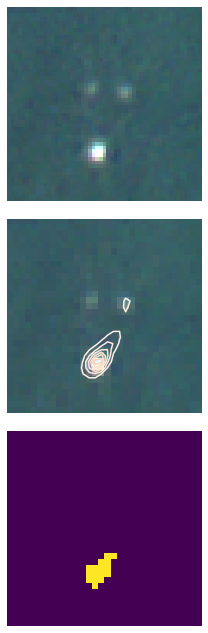

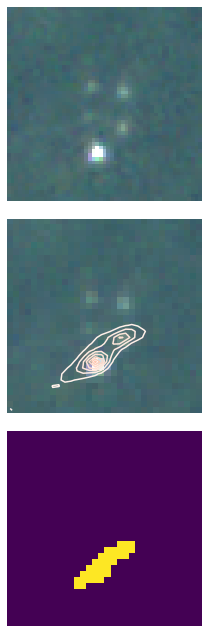

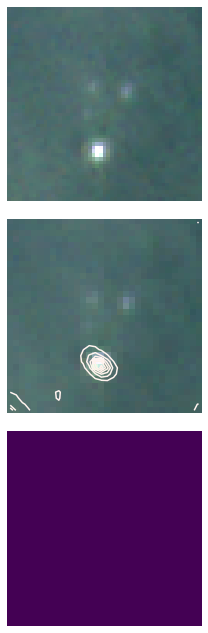

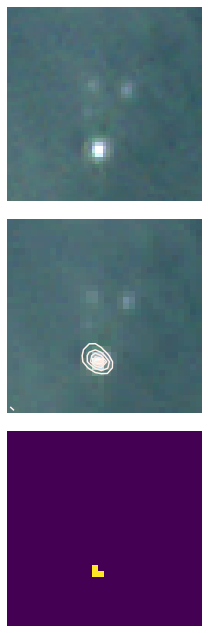

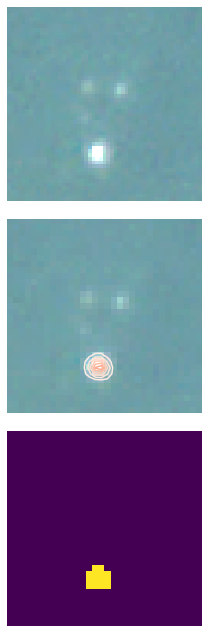

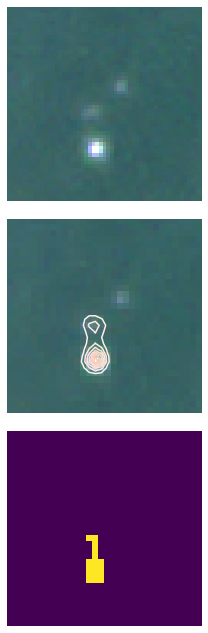

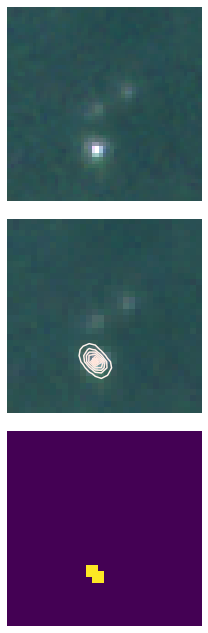

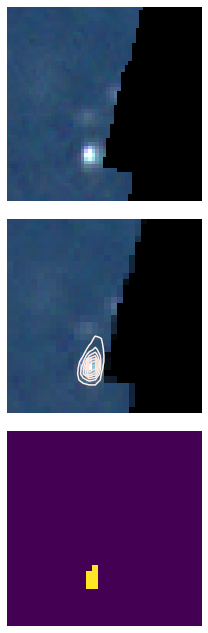

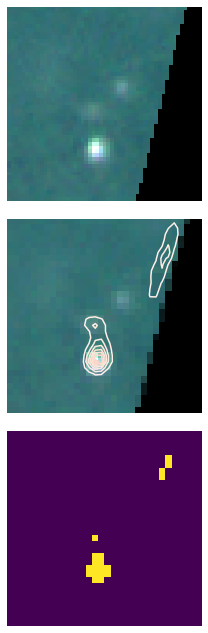

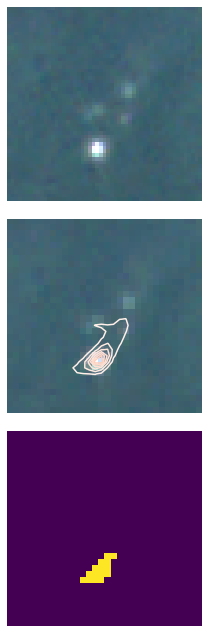

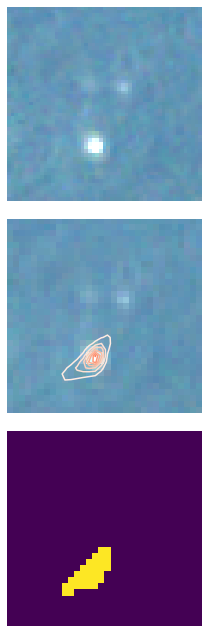

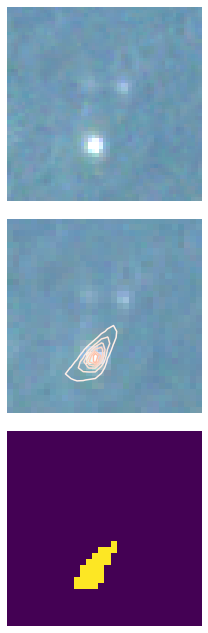

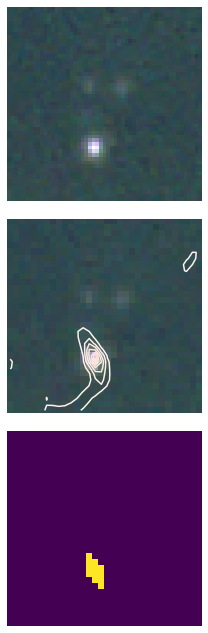

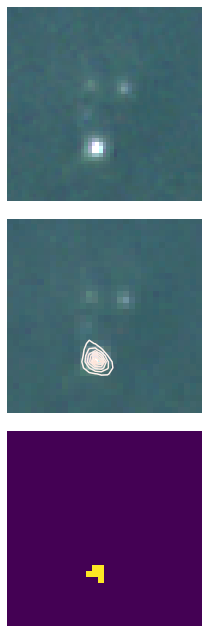

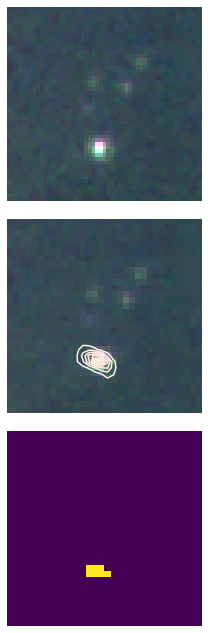

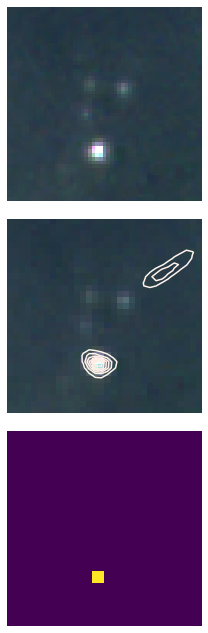

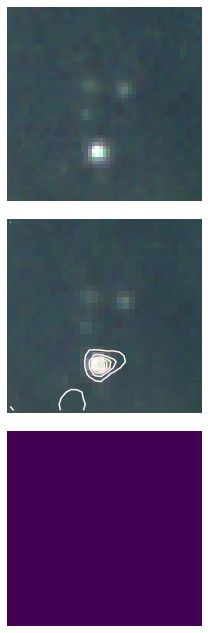

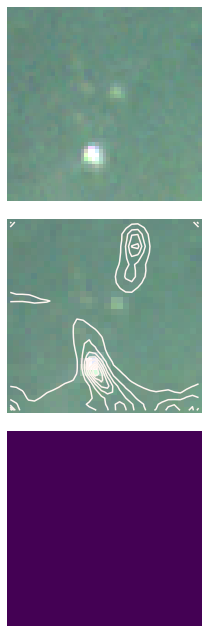

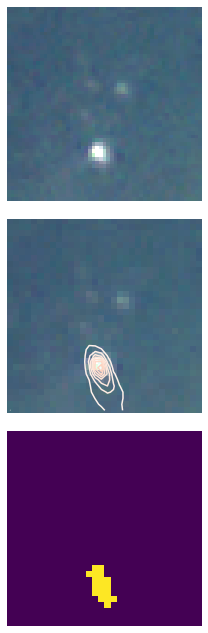

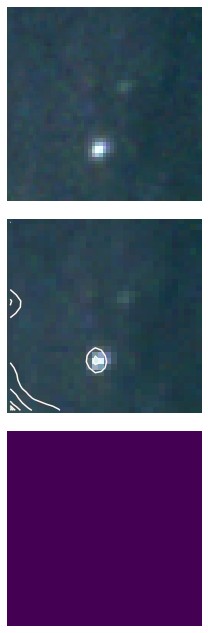

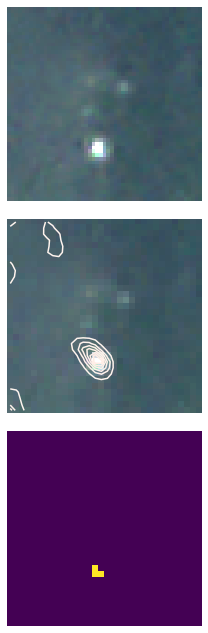

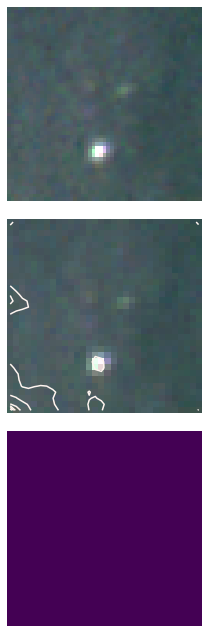

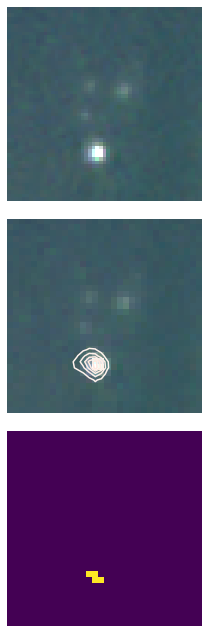

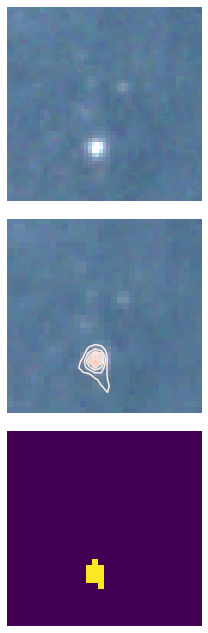

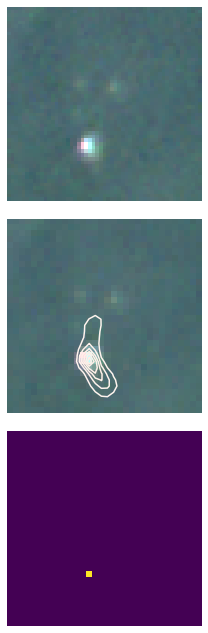

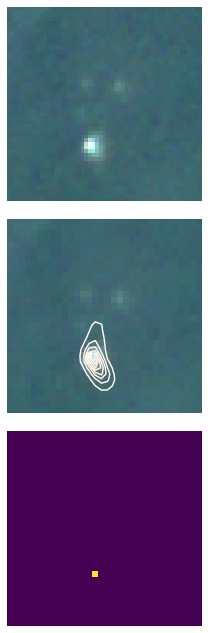

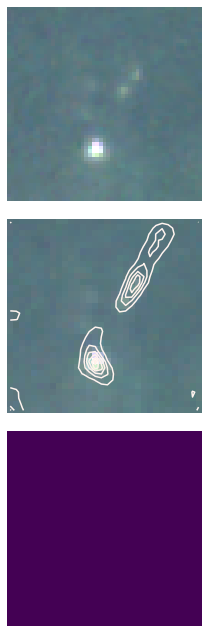

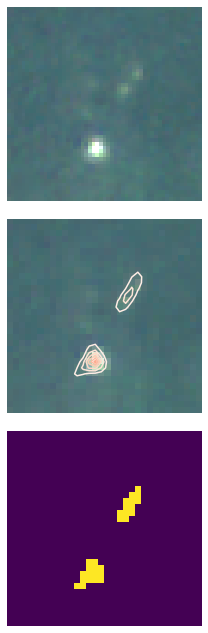

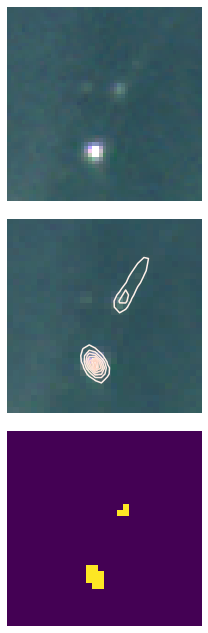

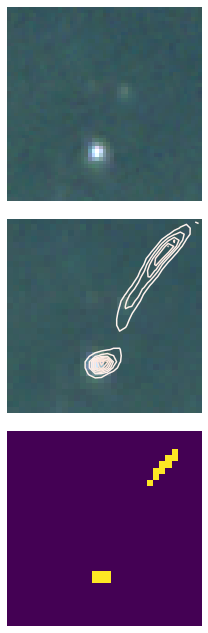

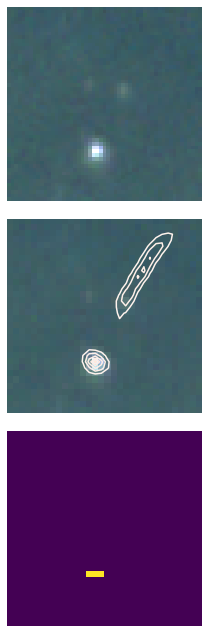

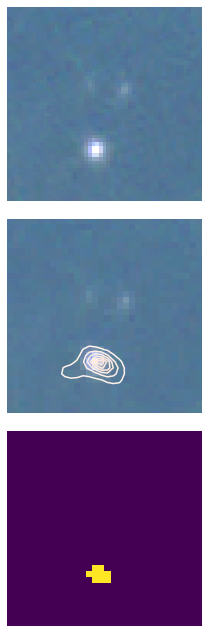

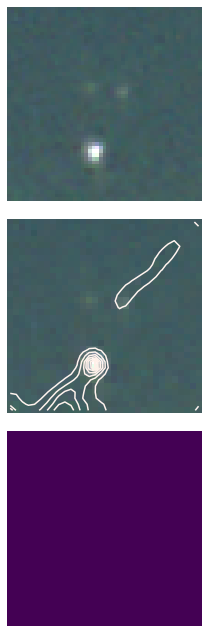

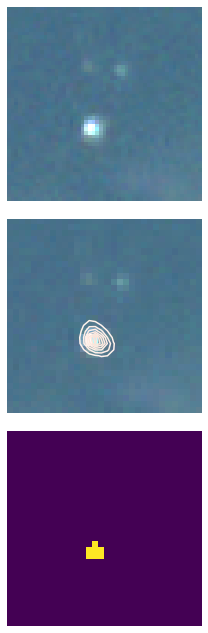

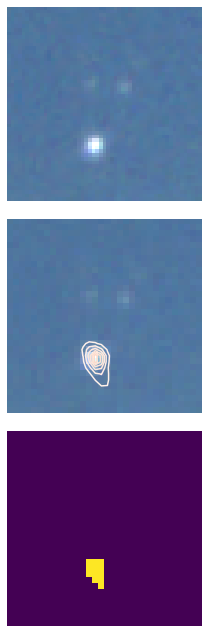

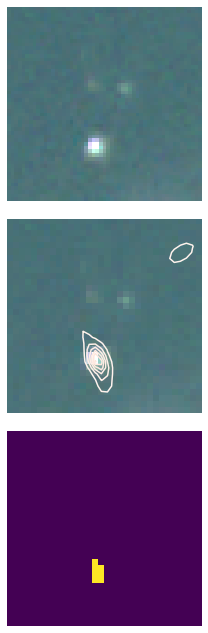

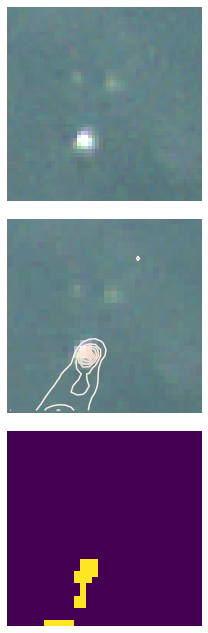

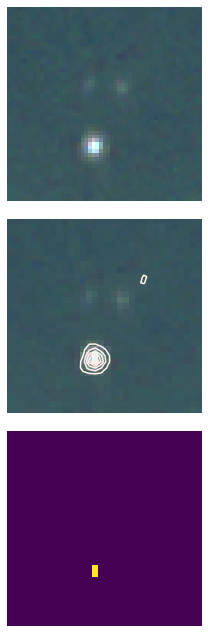

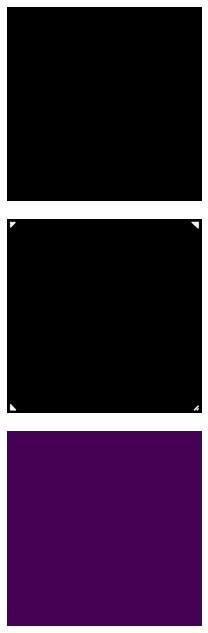

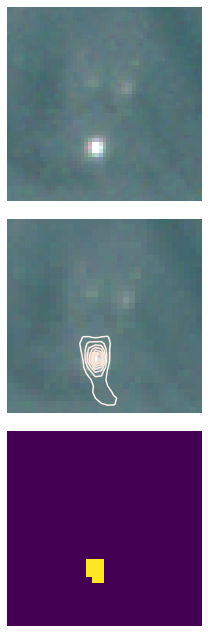

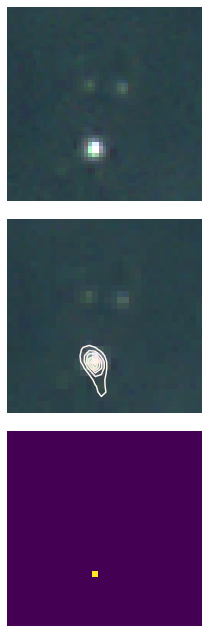

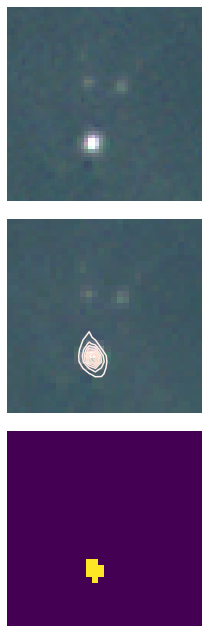

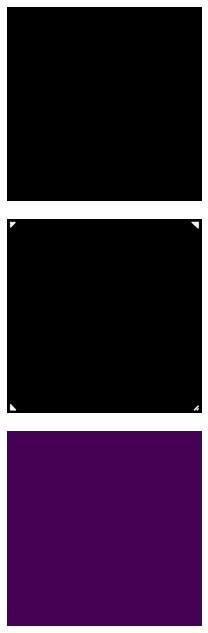

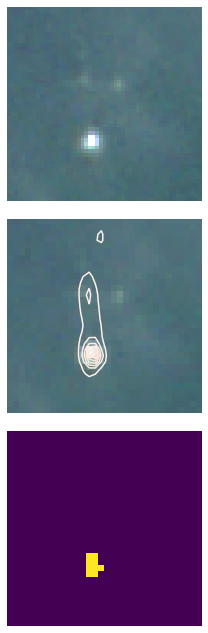

In [54]:
from data.plastic_litter_project import PlanetScopePLPDataset, ps_to_RGB, PLPDataset
from torchvision.transforms import Resize
import os

prediction_size = 32 # downsampled pixels sentinel resolution 10m
output_size = 53# in 3m pixels
resize = Resize(prediction_size)
resize_back = Resize(prediction_size)

planetds = PlanetScopePLPDataset(root="/data/marinedebris/PLP", year=2022, output_size=output_size)

model = SegmentationModel.load_from_checkpoint("/data/marinedebris/results/ours/unet++_hrbands/epoch=81-val_loss=0.51.ckpt")
model.eval()

for image, mask, date in planetds:
    X = torch.from_numpy(image.astype(np.int16)).float() * 1e-4
    X = resize(X)
    y_score = torch.sigmoid(model(X.unsqueeze(0)))
    y_score = y_score.squeeze()
    
    hr_image = ps_to_RGB(image)
    
    downsampled_image = ps_to_RGB(X * 1e4)
    score_image = y_score.detach().numpy()
    classification = y_score > model.threshold

    fig, axs = plt.subplots(3,1, figsize=(3,3*3))
    ax = axs[0]
    ax.imshow(hr_image)
    ax.axis("off")
    
    ax = axs[1]
    ax.imshow(downsampled_image)
    ax.contour(score_image, vmin=0, vmax=1, cmap="Reds")
    ax.axis("off")
    
    ax = axs[2]
    ax.imshow(classification)
    ax.axis("off")
    
    
    plt.tight_layout()
    os.makedirs("/tmp/plp2022/",exist_ok=True)
    fig.savefig(f"/tmp/plp2022/ps-{date}.png", transparent=True, bbox_inches="tight", pad_inches=0)
    

In [55]:
160/32

5.0

In [44]:
ps_to_RGB(X * 1e4)

(32, 32, 3)

<ipython-input-42-5d51dff8284d>:20: UserWarning: The following kwargs were not used by contour: 'map'
  ax.contour(y_score.detach().numpy()[8:-8, 8:-8], vmin=0, vmax=1, map="Reds")
<ipython-input-42-5d51dff8284d>:20: UserWarning: The following kwargs were not used by contour: 'map'
  ax.contour(y_score.detach().numpy()[8:-8, 8:-8], vmin=0, vmax=1, map="Reds")
<ipython-input-42-5d51dff8284d>:20: UserWarning: The following kwargs were not used by contour: 'map'
  ax.contour(y_score.detach().numpy()[8:-8, 8:-8], vmin=0, vmax=1, map="Reds")
<ipython-input-42-5d51dff8284d>:20: UserWarning: The following kwargs were not used by contour: 'map'
  ax.contour(y_score.detach().numpy()[8:-8, 8:-8], vmin=0, vmax=1, map="Reds")
<ipython-input-42-5d51dff8284d>:20: UserWarning: The following kwargs were not used by contour: 'map'
  ax.contour(y_score.detach().numpy()[8:-8, 8:-8], vmin=0, vmax=1, map="Reds")
<ipython-input-42-5d51dff8284d>:20: UserWarning: The following kwargs were not used by contour:

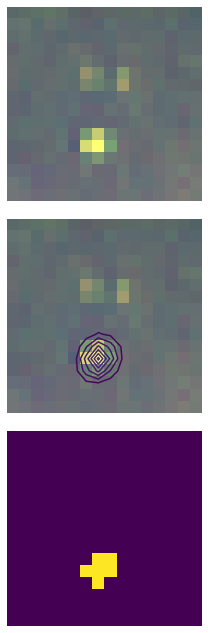

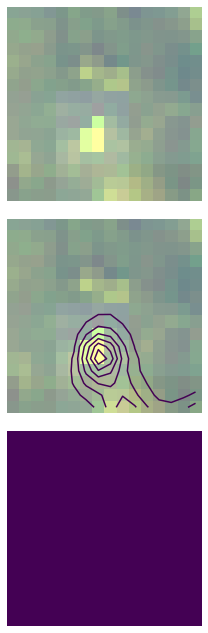

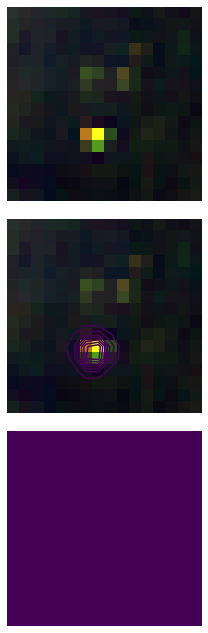

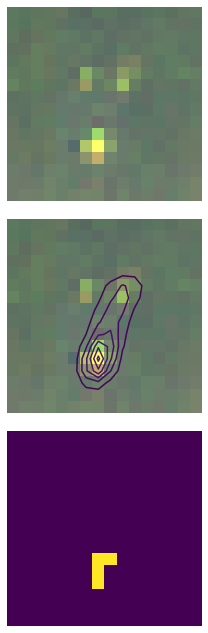

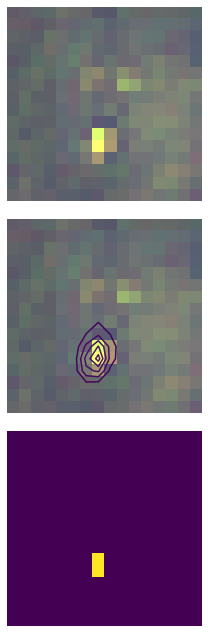

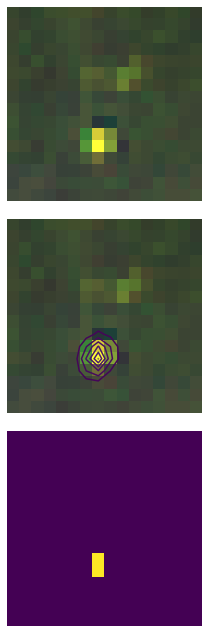

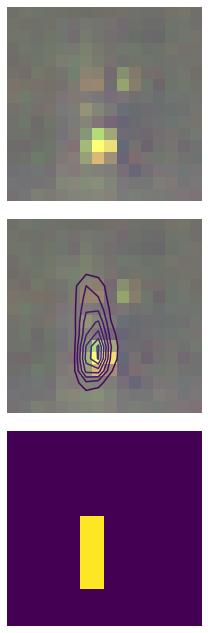

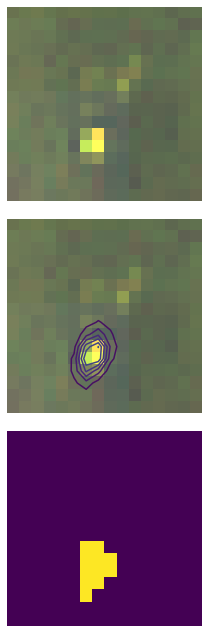

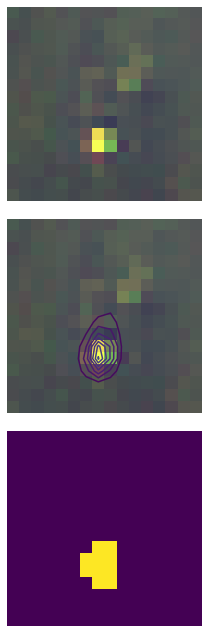

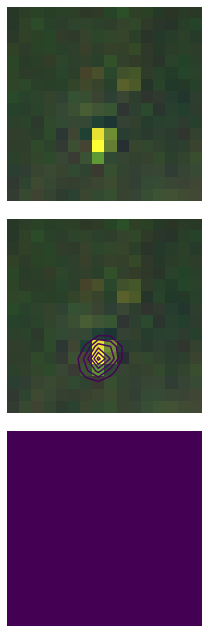

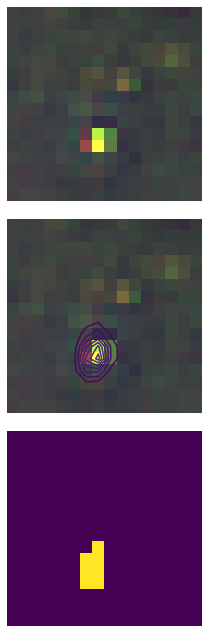

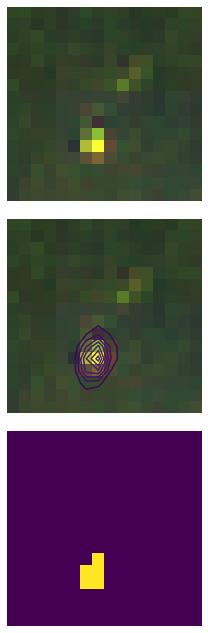

In [42]:
full_model = SegmentationModel.load_from_checkpoint("/data/marinedebris/results/ours/unet++_2022-10-03_04:00:27/epoch=89-val_loss=0.52.ckpt")

#full_model = SegmentationModel.load_from_checkpoint("/home/marc/projects/marinedetector/checkpoints/flobs-segm-hrbands/flobs-segm-allbands/epoch=92-val_loss=0.51.ckpt")
full_model.eval()

ds = PLPDataset(root="/data/marinedebris/PLP", year=2022, output_size=32)

for image, mask, date in ds:
    X = torch.from_numpy(image)
    y_score = torch.sigmoid(full_model.model(X.unsqueeze(0)))
    y_score = y_score.squeeze()
    
    fig, axs = plt.subplots(3, 1, figsize=(3,3*3))
    ax = axs[0]
    ax.imshow(ps_to_RGB(image * 1e4)[8:-8, 8:-8])
    ax.axis("off")
    
    ax = axs[1]
    ax.imshow(ps_to_RGB(X * 1e4)[8:-8, 8:-8])
    ax.contour(y_score.detach().numpy()[8:-8, 8:-8], vmin=0, vmax=1, map="Reds")
    ax.axis("off")
    
    ax = axs[2]
    ax.imshow((y_score > model.threshold)[8:-8, 8:-8])
    ax.axis("off")
    
    plt.tight_layout()
    os.makedirs("/tmp/plp2022/",exist_ok=True)
    fig.savefig(f"/tmp/plp2022/s2-{date}.png", transparent=True, bbox_inches="tight", pad_inches=0)

In [19]:
s2scene = "/data/marinedebris/marinedebris_refined/accra_20181031.tif"
#ps_scene = "/data/marinedebris/PS_floatingobjects/accra_2018-10-31_psscene4band_analytic_sr_udm2/files/PSScene4Band/20181031_095850_0f43/analytic_sr_udm2/20181031_095850_0f43_3B_AnalyticMS_SR.tif"
ps_scene = "/data/marinedebris/PS_floatingobjects/accra_2018-10-31_psscene4band_analytic_sr_udm2/files/PSScene4Band/20181031_101439_0f36/analytic_sr_udm2/20181031_101439_0f36_3B_AnalyticMS_SR.tif"
point_file = "/data/marinedebris/marinedebris_refined/accra_20181031_qualitative_point.shp"

In [20]:
import geopandas as gpd
gdf = gpd.read_file(point_file)

(-0.5, 127.5, 127.5, -0.5)

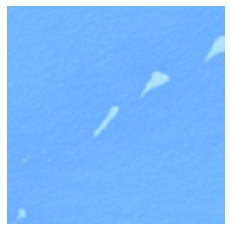

In [31]:
import rasterio as rio
from visualization import rgb
from rasterio.windows import from_bounds
from data.utils import read_tif_image

offset = 640

with rio.open(s2scene) as src:
    crs = src.crs
    transform = src.transform

gdf_ = gdf.to_crs(crs)
x = gdf_.iloc[0].geometry.centroid.x
y = gdf_.iloc[0].geometry.centroid.y

window = from_bounds(x-offset,y-offset,x+offset,y+offset,transform)
s2_arr, transform = read_tif_image(s2scene,window)

#plt.imshow(rgb(s2_arr).transpose(1,2,0))
s2_rgb = np.clip(s2_arr[np.array([3,2,1])] / 1000,0,1).transpose(1,2,0)

fig, ax = plt.subplots()
ax.imshow(s2_rgb)
ax.axis("off")

(-0.5, 127.5, 127.5, -0.5)

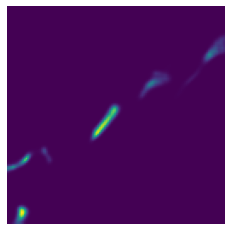

In [30]:
X = torch.from_numpy(s2_arr * 1e-4).float()

y_score = torch.sigmoid(full_model.model(X.unsqueeze(0)))
y_score = y_score.squeeze()

fig, ax = plt.subplots()
ax.imshow(y_score.detach().numpy())
ax.axis("off")

In [23]:
with rio.open(ps_scene) as src:
    crs = src.crs
    transform = src.transform
    
offset = 640
    
gdf_ = gdf.to_crs(crs)
x = gdf_.iloc[0].geometry.centroid.x
y = gdf_.iloc[0].geometry.centroid.y
window = from_bounds(x-offset,y-offset,x+offset,y+offset,transform)

window = from_bounds(x-offset,y-offset,x+offset,y+offset,src.transform)
with rio.open(ps_scene) as src:
    ps_arr = src.read(window=window)

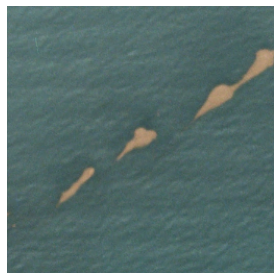

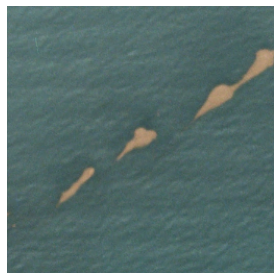

In [36]:
from skimage.exposure import equalize_hist
#ps_rgb = equalize_hist(ps_arr[np.array([2,1,0])]).transpose(1,2,0)

from torchvision.transforms import Resize
resize = Resize(256)

ps_arr_downsample = resize(torch.from_numpy(ps_arr.astype(np.int16))).numpy()

ps_rgb = np.clip(ps_arr[np.array([2,1,0])] / 1000,0,1).transpose(1,2,0)

fig, ax = plt.subplots()
ax.imshow(ps_rgb_downsample)
ax.axis("off")

plt.tight_layout()

ps_rgb_downsample = np.clip(ps_arr_downsample[np.array([2,1,0])] / 1000,0,1).transpose(1,2,0)

fig, ax = plt.subplots()
ax.imshow(ps_rgb_downsample)
ax.axis("off")

plt.tight_layout()

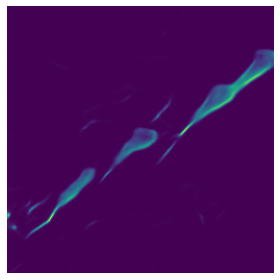

In [37]:


X = torch.from_numpy(ps_arr * 1e-4).float()

X = resize(X)

y_score = torch.sigmoid(model.model(X.unsqueeze(0)))
y_score = y_score.squeeze().detach().numpy()

fig, ax = plt.subplots()

ax.imshow(ps_rgb_downsample)
ax.imshow(y_score)
ax.axis("off")

plt.tight_layout()